<a href="https://colab.research.google.com/github/Albertostodias/Albertostodias/blob/main/Reliability_for_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reliability for Maintenance**

# *Library Needed*

---



In [ ]:
pip install reliability

In [ ]:
from reliability.Fitters import Fit_Weibull_2P
from reliability.Other_functions import make_right_censored_data
from reliability.Distributions import Weibull_Distribution
import matplotlib.pyplot as plt
import pandas as pd

# *Analizys for Multiple Components*

---



In [ ]:
#A = [10,9,8,7]
#B = [3,2,1,4,5]
#C= [20,25,32,41,32,29,55,70]
#D = [21,35,27,58]

In [ ]:
#motor = [A,B] # index (0) failure, inderx(1) right censored
#transmissão = [C,D]  # index (0) failure, inderx(1) right censored
#dados=[motor,transmissão]# consolidação de listas
#for i in dados:
#    data = i[0] # failures
#   #print(f'Componente {dados[0]}' )
#    suspensos = i[1] # right censored

# *Analizys for only Components* 





Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 8/26 (76.47059% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         37700.8         13685.3   18508.3   76795.3
     Beta         1.42354         0.44591  0.770437   2.63027 

Goodness of fit    Value
 Log-likelihood -94.7182
           AICc  193.823
            BIC  196.489
             AD  72.2669 

Table of quantiles (95% CI bounds on time):
 Quantile  Lower Estimate  Point Estimate  Upper Estimate
     0.01          318.02         1489.12          6972.8
     0.05         1894.36         4679.49         11559.4
      0.1         3994.05         7758.99         15072.9
      0.2         7946.06         13144.6         21744.1
     0.25         9653.66         15712.7         25574.5
      0.5         15899.7           29143         53416.9
     0.75         20889.5         47424.2          107664
      0.8 

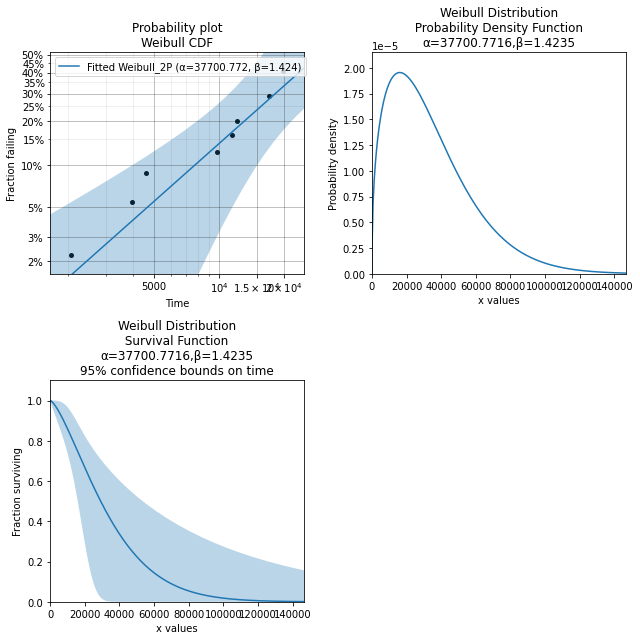

In [ ]:
falhas = [2066, 11457, 12141, 4586, 19766, 9760, 3944, 17084] # failures
suspensos = [15763, 15180, 4394, 15086, 16101, 15362, 13886, 16685, 19689, 14950, 22257, 17365, 20576, 15756, 7231, 3472, 4195, 28002, 11815, 10984, 14896, 428, 21152, 1316, 13264, 16785] # right censored

plt.subplot(221)
wb = Fit_Weibull_2P(failures=falhas,right_censored=suspensos,show_probability_plot=True,print_results=True,CI=0.95, quantiles=True,CI_type='time', method='MLE', optimizer= None) # cumulative density failure

plt.subplot(223)
wb.distribution.SF() # survival funciotion find in table reliability = probalitity survival 

plt.subplot(222)
wb.distribution.PDF() # probility density failure find in table reliability = probability failure

plt.tight_layout()
plt.show()

# *Reliability Table*




In [ ]:
print('Probability Failure')
for i in suspensos:
    j = wb.distribution.CDF(i)
    print(f'{i} = {j*100: .2f} %')

Probability Failure
15763 =  25.10 %
15180 =  23.96 %
4394 =  4.58 %
15086 =  23.78 %
16101 =  25.76 %
15362 =  24.31 %
13886 =  21.44 %
16685 =  26.90 %
19689 =  32.74 %
14950 =  23.51 %
22257 =  37.64 %
17365 =  28.23 %
20576 =  34.45 %
15756 =  25.08 %
7231 =  9.09 %
3472 =  3.30 %
4195 =  4.30 %
28002 =  48.05 %
11815 =  17.45 %
10984 =  15.87 %
14896 =  23.40 %
428 =  0.17 %
21152 =  35.55 %
1316 =  0.84 %
13264 =  20.23 %
16785 =  27.10 %


In [ ]:
print('Probability Survival')
for i in suspensos:
    j = wb.distribution.SF(i)
    print(f'{i} = {j*100: .2f} %')

Probability Survival
15763 =  74.90 %
15180 =  76.04 %
4394 =  95.42 %
15086 =  76.22 %
16101 =  74.24 %
15362 =  75.69 %
13886 =  78.56 %
16685 =  73.10 %
19689 =  67.26 %
14950 =  76.49 %
22257 =  62.36 %
17365 =  71.77 %
20576 =  65.55 %
15756 =  74.92 %
7231 =  90.91 %
3472 =  96.70 %
4195 =  95.70 %
28002 =  51.95 %
11815 =  82.55 %
10984 =  84.13 %
14896 =  76.60 %
428 =  99.83 %
21152 =  64.45 %
1316 =  99.16 %
13264 =  79.77 %
16785 =  72.90 %
